# Importing all the Necessary Libraries

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Reading the Data

In [234]:
Data = pd.read_csv('Churn_Modelling.csv')
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [235]:
Data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [236]:
Data.shape

(10000, 14)

In [237]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [238]:
Data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Checking the Null values in Data set

In [239]:
Data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Checking for any Duplicated Data

In [240]:
Data.duplicated().any()

False

# Dropping the Irrelevant Features 

In [241]:
Data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [242]:
Data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [243]:
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding the categorical data 

In [244]:
Data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [245]:
Data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [246]:
Data = pd.get_dummies(Data,drop_first=True)

In [247]:
Data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Not handling Imbalance data set 

In [248]:
Data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

c:\Users\navee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

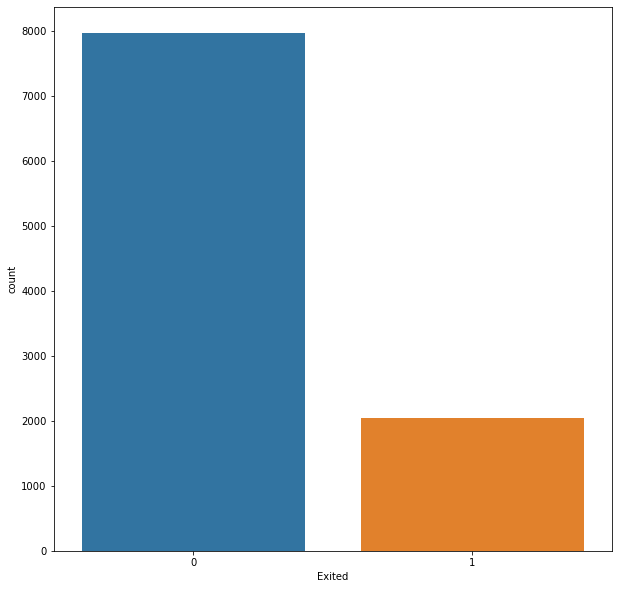

In [249]:
plt.figure(figsize=(10,10))
sns.countplot(Data['Exited'],data=Data)

In [250]:
X = Data.drop('Exited',axis=1)
y = Data['Exited']

# Splitting the Data set into the Training Set and Testing set 

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [252]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5702,585,36,7,0.00,2,1,0,94283.09,0,0,1
3667,525,33,4,131023.76,2,0,0,55072.93,1,0,1
1617,557,40,4,0.00,2,0,1,105433.53,0,1,0
5673,639,34,5,139393.19,2,0,0,33950.08,0,1,1
4272,640,34,3,77826.80,1,1,1,168544.85,0,1,0


In [253]:
y_train.head()

2151    1
8392    1
5006    0
4117    0
7182    0
Name: Exited, dtype: int64

# Feature Scaling 

In [254]:
Data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [255]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [256]:
X_train = st.fit_transform(X_train)
X_test= st.transform(X_test)

In [257]:
X_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

# Logistic Regression

In [258]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [259]:
LR.fit(X_train,y_train)

LogisticRegression()

In [260]:
y_predict1 = LR.predict(X_test)

In [261]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict1)

0.808

In [262]:
# Because of the imbalance data set we have to check the further metrics 
from sklearn.metrics import precision_score,recall_score,f1_score


In [263]:
precision_score(y_test,y_predict1)

0.5891472868217055

In [264]:
recall_score(y_test,y_predict1)

0.18673218673218672

In [265]:
f1_score(y_test,y_predict1)

0.2835820895522388

# Handling the Imbalnace data with SMOTE

In [266]:
from imblearn.over_sampling import SMOTE

In [267]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [268]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# Performing all the steps After Handling imbalanced data 

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [270]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test= st.transform(X_test)

In [271]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [272]:
LR.fit(X_train,y_train)

LogisticRegression()

In [273]:
y_predict1 = LR.predict(X_test)

In [274]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict1)

0.7915881983678594

In [275]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [276]:
precision_score(y_test,y_predict1)

0.7755734655920645

In [277]:
recall_score(y_test,y_predict1)

0.8055376690276883

In [278]:
f1_score(y_test,y_predict1)

0.7902716361339229

# Support vector Classifier 

In [279]:
from sklearn import svm
svc = svm.SVC()

In [280]:
svc.fit(X_train,y_train)

SVC()

In [281]:
y_predict2 = svc.predict(X_test)

In [282]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict2)

0.847457627118644

# Kneighbors Classifier

In [283]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [284]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [285]:
y_predict3 = knc.predict(X_test)

In [286]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict3)

0.8320778405524168

# Decision Tree Classifier 

In [287]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [288]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [289]:
y_predict4 = dtc.predict(X_test)

In [290]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict4)

0.8097928436911488

# Random Forest Classifier

In [291]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [292]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [293]:
y_predict5 = rfc.predict(X_test)

In [294]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict5)

0.8656622724419335

# Gradient Boosting Classifier

In [295]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [296]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [297]:
y_predict6 = gbc.predict(X_test)

In [298]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict6)

0.849654739485248

In [299]:
precision_score(y_test,y_predict6)

0.8407360406091371

# Visualizing the all the Models accuracy scores 

In [300]:
final_scores = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                       'ACC':[accuracy_score(y_test,y_predict1),
                              accuracy_score(y_test,y_predict2),
                              accuracy_score(y_test,y_predict3),
                              accuracy_score(y_test,y_predict4),
                              accuracy_score(y_test,y_predict5),
                              accuracy_score(y_test,y_predict6)]})

In [301]:
final_scores

,Models,ACC
0,LR,0.791588
1,SVM,0.847458
2,KNN,0.832078
3,DT,0.809793
4,RF,0.865662
5,GB,0.849655


<AxesSubplot:xlabel='Models', ylabel='ACC'>

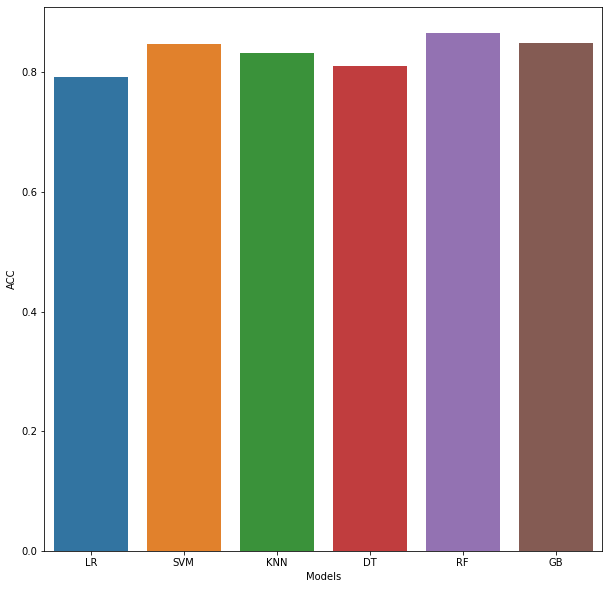

In [302]:
plt.figure(figsize=(10,10))
sns.barplot(x='Models',y='ACC',data=final_scores)

# Building the final Model Based upon Final scores i,e. Random Forest Classifier

In [303]:
X_res = st.fit_transform(X_res)

In [304]:
rfc.fit(X_res,y_res)

RandomForestClassifier()

# Saving the Model 

In [305]:
import joblib

In [306]:
joblib.dump(rfc,'Customer_Churn_prediction')

['Customer_Churn_prediction']

In [307]:
Model = joblib.load('Customer_Churn_prediction')

In [308]:
Data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [309]:
result = Model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

In [310]:
if result[0]==0:
    print('Customer is Not Leaving the Bank')
else:
    print('Customer is leaving the Bank')

Customer is leaving the Bank
